In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
#!pip install dtreeviz
#from dtreeviz.trees import dtreeviz
from sklearn import tree
#!git clone https://github.com/ajayarunachalam/RegressorMetricGraphPlot.git
#cd RegressorMetricGraphPlot/
#from regressioncomparemetricplot import CompareModels
#import scikitplot as skplt
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

Reading dataset from csv file. There is a column named "Unnamed" containing the indices. Removing it from the dataset.

9 columns forms the 'x' and price column is the 'y'. "Cut, Color, Clarity, Carat' is main 4C's in determining the price. The "x,y,z" represents the dimensions of the diamond. Depth is given by the calculation: z/mean(x,y). The table represents the width (flat facet of the diamond,responsible for reflecting the light). 

In [ ]:
df = pd.read_csv("diamonds.csv")
display(df.head(3))
df.drop("Unnamed: 0", axis=1, inplace=True)
display(df.head(6))
df.info()
df_original=df.copy()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Data Preprocessing step

Checking for null values and any invalid datatype

In [ ]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The minimum values of x,y,z is shown as 0. This represents dimensionless diamonds or faulty data points. Removing the faulty datapoints. The shape command shows 20 faulty datapoints have been removed. 

In [ ]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

Pairplot to visualise the data correlation and to identify the outliers

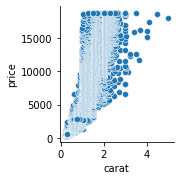

In [ ]:
# plot price vs. carat
#sns.set(style="ticks", color_codes=True)
#p=sns.color_palette('bright')
#sns.palplot(p)

sns.pairplot(df, x_vars=["carat"], y_vars=["price"], markers=["D","+"], palette="bright")
plt.show()

Plotting carat parameter vs other C's (Cut, Color, Clarity). Using hue in pairplot

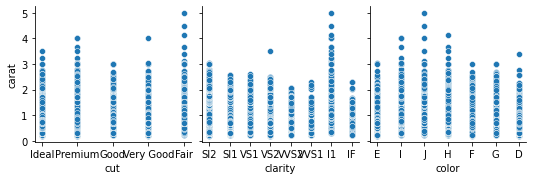

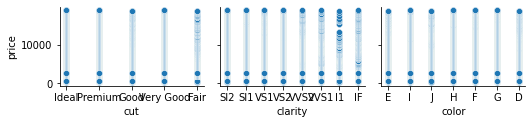

In [ ]:
shade=["#00FF00","#FFBF00","#FF0000","#800080","#000000"]
#ax = sns.pairplot(df, hue="carat", x_vars=['cut', 'clarity', 'color'], y_vars = ['carat'],palette="bright")
sns.pairplot(df, x_vars=['cut', 'clarity', 'color'], y_vars = ['carat'])
sns.pairplot(df, x_vars=['cut', 'clarity', 'color'], y_vars = ['price'])
plt.tight_layout()
plt.subplots_adjust(bottom=0.5)
plt.show()

most bigger diamonds (higher carat) fall in Fair cut, I1 clarity and H-I color. These are poor (commercial grade) diamonds. 

histplot to see the distribution and to identify the outliers. We are considering continuous variable for histplot.

In [ ]:
def histplot(df, listvar):
 fig, axes = plt.subplots(nrows=1, ncols=len(listvar), figsize=(20, 4))
 counter=0
 for ax in axes:
  df.hist(column=listvar[counter], bins=20, ax=axes[counter])
  plt.xlabel(listvar[counter])
  counter = counter+1
 fig.tight_layout()
 plt.show()

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

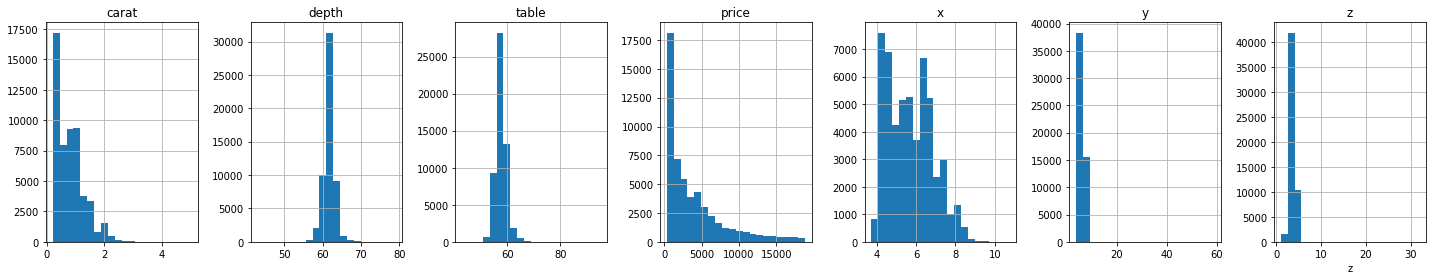

In [ ]:
#Selecting continuous variables
continuous_vars = df.select_dtypes(include=[np.number]).columns
display(list(continuous_vars))
histplot(df,continuous_vars)

From the above graphs, we can predict that there are some outliers. To visualise the outliers, boxplot is used.

In [ ]:
def dfboxplot(df, listvar):
 fig, axes = plt.subplots(nrows=1, ncols=len(listvar), figsize=(20, 3))
 counter=0
 for ax in axes:
  df.boxplot(column=listvar[counter], ax=axes[counter])
  plt.xlabel(listvar[counter])
  counter = counter+1
 plt.tight_layout()
 plt.show()

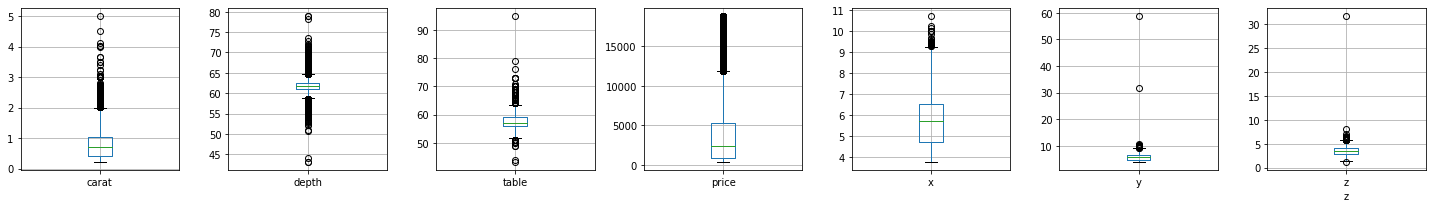

In [ ]:
dfboxplot(df, continuous_vars)
#Features=df['carat','depth','table','price','x','y','z']
#dfbox=df[["price","Features"]]
#dfbox=pd.DataFrame(dfbox)
#ns.boxplot(y='price', x='Features',data=dfbox)
#plt.xticks(rotation=90)
#plt.ylabel("Price")

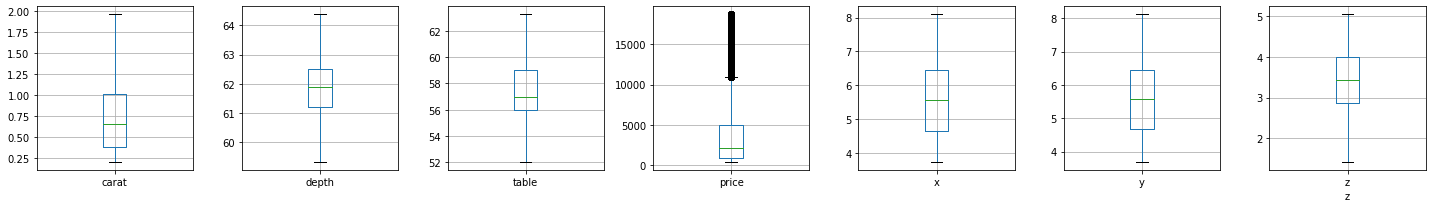

In [ ]:
def removeoutliers(df, listvars, z):
    from scipy import stats
    for var in listvars:
        df1 = df[np.abs(stats.zscore(df[var])) < z]
    return df1
#df = removeoutliers(df, continuous_vars,2)
#df.shape

#Outliers removal using IQR
def remove_outlier(df_in, col_name):
  q1 = df_in[col_name].quantile(0.25)
  q3 = df_in[col_name].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  fence_low  = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
  return df_out

for c_vars in list(continuous_vars):
  if c_vars != "price":
   df = remove_outlier(df, c_vars)

dfboxplot(df, continuous_vars)

#Dropping the outliers. 
#df  = df[(df["depth"]<75)&(df["depth"]>45)]
#df  = df[(df["table"]<80)&(df["table"]>40)]
#df = df[(df["x"]<30)]
#df = df[(df["y"]<30)]
#df = df[(df["z"]<30)&(df["z"]>2)]
#df.shape

Log Transform

In [ ]:
#def log_transform(df, listvars):
#   for var in listvars:
#      df[var] = np.log(df[var])
#log_transform(df, continuous_vars)
#histplot(df, continuous_vars)

Label Encoding of the categorical variables.

In [ ]:
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:", end=" ")
print(object_cols)

# Make copy to avoid changing original data 
#label_data = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])
#To visualise the values given to the labels.
#The index of the label represents the value given to the label
    print("Values of the label_encoder for {}: ".format(col), end=" ")
    print(label_encoder.classes_)
df.head(5)


Categorical variables: ['cut', 'color', 'clarity']
Values of the label_encoder for cut:  ['Fair' 'Good' 'Ideal' 'Premium' 'Very Good']
Values of the label_encoder for color:  ['D' 'E' 'F' 'G' 'H' 'I' 'J']
Values of the label_encoder for clarity:  ['I1' 'IF' 'SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2']


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48


In [ ]:
print(df.shape)
df.describe()

(47876, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
count,47876.000000,47876.000000,47876.000000,47876.000000,47876.000000,47876.000000,47876.000000,47876.000000,47876.000000,47876.000000
mean,0.732509,2.630441,2.530746,3.908618,61.823920,57.218799,3458.338813,5.596991,5.602071,3.461684
std,0.393437,0.928036,1.674042,1.733414,1.027178,1.995679,3361.218235,1.017209,1.011701,0.629377
min,0.200000,0.000000,0.000000,0.000000,59.300000,52.000000,326.000000,3.730000,3.680000,1.410000
25%,0.380000,2.000000,1.000000,2.000000,61.200000,56.000000,903.750000,4.650000,4.670000,2.870000
50%,0.660000,2.000000,3.000000,4.000000,61.900000,57.000000,2171.000000,5.570000,5.570000,3.440000
75%,1.020000,3.000000,4.000000,5.000000,62.500000,59.000000,4914.000000,6.450000,6.450000,4.000000
max,1.970000,4.000000,6.000000,7.000000,64.400000,63.300000,18806.000000,8.110000,8.130000,5.060000


Correlation Matrix : To know the relationship between the attributes and variables in a dataset. To be precise, how one variable is related to another in a dataset.

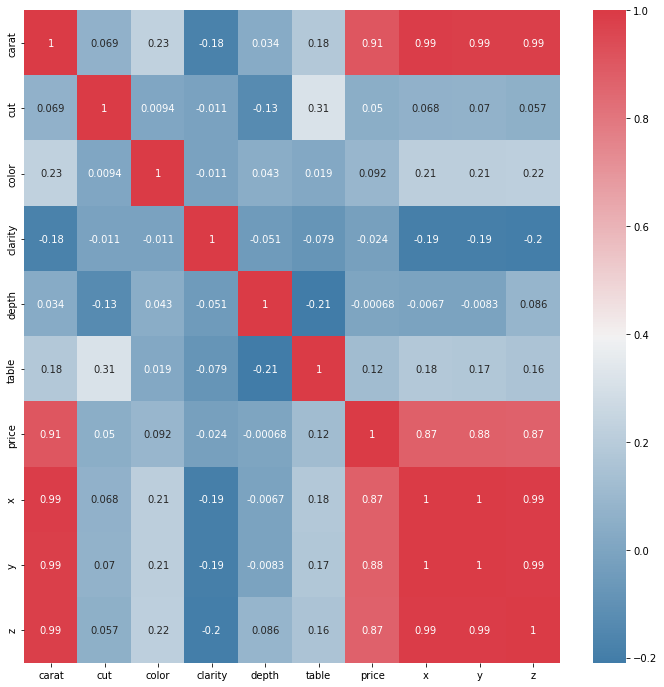

In [ ]:
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
corrmat= df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

Creating feature set and target set. "X" and "Y"

In [ ]:
# Assigning the featurs as X and trarget as y
y= df["price"]
X= df.drop(["price"],axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)
#print(X_test.shape[1])

Building pipelins of standard scaler and model for various regressors.

In [ ]:
#Normalizing the data only numerical using StandardScaler.
continuous_vars = list(continuous_vars)
print(continuous_vars)
features = df[continuous_vars]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df[continuous_vars] = features
df.head(5)

dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state = 0)
xgb = XGBRegressor(random_state =0,verbosity = 0, silent = True)

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


In [ ]:
# List of all the regressors
regressors = [dt, rf, xgb]

# Dictionary of pipelines and model types for ease of reference
regressor_dict = {0:"DecisionTree", 1:"RandomForest", 2:"XGBRegressor"}

# Fit the pipelines
for model in regressors:
    model.fit(X_train, y_train)

Cross validation

In [ ]:
print("{:<30} {:<35} {:<35}".format("Model","RMSE","R2"))
for i, model in enumerate(regressors):
    cv_score_NRMSE = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_score_R2 = cross_val_score(model, X_train,y_train,scoring="r2", cv=10)
    print("{:30s} {:<35} {:<35}".format(regressor_dict[i], -1*cv_score_NRMSE.mean(), cv_score_R2.mean()))

Model                          RMSE                                R2                                 
DecisionTree                   591.801095849941                    0.968985726937316                  
RandomForest                   429.3626180281159                   0.98367031335571                   
XGBRegressor                   530.140463448892                    0.9751033112283014                 


Considering RandomForest and XGBRegressor to predict the values

In [ ]:
pred_random = rf.predict(X_test)
pred_XGB = xgb.predict(X_test)
pred_dt = dt.predict(X_test)

predicted_list = [pred_dt,pred_random,pred_XGB]

Model                          RMSE                                MSE                                 MAE                                 Adjusted R2                         R2                                 
DecisionTree                   574.0874423549342                   329576.3914696299                   293.90441975102345                  0.9707311584210386                  0.9707531687464239                 
RandomForest                   427.3700394078132                   182645.15058343578                  220.4172158224222                   0.9837797484408566                  0.9837919461567683                 
XGBRegressor                   525.7530761311675                   276416.2970613852                   292.08004888674304                  0.9754521712782381                  0.9754706313767088                 
Graph Observations


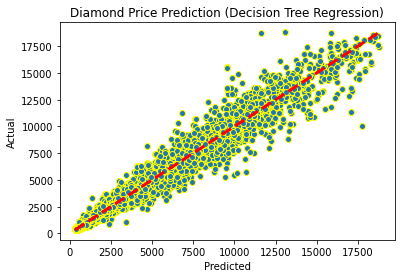

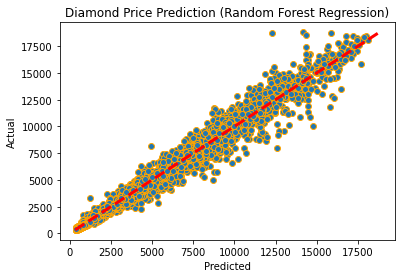

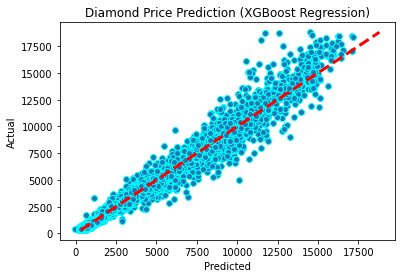

In [ ]:
# Model Evaluation
rmse=[None]*3
mse=[None]*3
mae=[None]*3
ar2 = [None]*3
r2=[None]*3
print("{:<30} {:<35} {:<35} {:<35} {:<35} {:<35}".format("Model","RMSE","MSE","MAE","Adjusted R2","R2"))
for i, model in enumerate(predicted_list):
  rmse[i] = np.sqrt(metrics.mean_squared_error(y_test, predicted_list[i]))
  mse[i] = metrics.mean_squared_error(y_test, predicted_list[i])
  mae[i] = metrics.mean_absolute_error(y_test, predicted_list[i])
  r2[i] = metrics.r2_score(y_test, predicted_list[i])
  ar2[i] = 1-(1-r2[i])*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
  print("{:30s} {:<35} {:<35} {:<35} {:<35} {:<35}".format(regressor_dict[i], rmse[i],mse[i],mae[i],ar2[i],r2[i]))

print("==============================================================================")
print("Graph Observations")
fig, ax = plt.subplots()
ax.scatter(pred_dt, y_test, edgecolors='yellow')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Diamond Price Prediction (Decision Tree Regression)')
plt.show()

fig, ax = plt.subplots()
ax.scatter(pred_random, y_test, edgecolors='orange')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Diamond Price Prediction (Random Forest Regression)')
plt.show()

fig, ax = plt.subplots()
ax.scatter(pred_XGB, y_test, edgecolors='cyan')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Diamond Price Prediction (XGBoost Regression)')
plt.show()
print("================================================================================")

In [ ]:
#Printing the predicted and actual values given by random forest
comparison_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':pred_random})
comparison_df.head(15)

,Real Values,Predicted Values
42710,1340,1435.46
43079,1378,1268.66
15527,6221,6330.54
8048,582,552.53
115,2762,2786.93
8525,4427,4203.99
11855,5103,5279.47
45667,1694,1736.93
8475,4416,4370.77
2838,3269,3398.66


In [ ]:
#Random Forest Regressor
print(X_train.shape)
print(y_train.shape)
rf = RandomForestRegressor(random_state = 35)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


(35907, 9)
(35907,)
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 35,
 'verbose': 0,
 'warm_start': False}


Random Forest Hyperparameter Tuning Considerations
n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)

Creating a grid to select the appropriate hyperparameters.
On each iteration, the algorithm will choose a difference combination of the features. Hence, there are 2 * 12 * 2 * 3 * 3 * 10 = 4320 settings/combinations.

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


Random Search Training to determine the best hyperparameters

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 35)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=35, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=35),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=35, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [ ]:
#Predict and calculate the metrics with best fit params
best_random = rf_random.best_estimator_
pred_best_random= best_random.predict(X_test)

Random Forest
R^2: 0.9839753902276177
Adjusted R^2: 0.9839633305664461
MAE: 219.1287996807078
MSE: 180577.9579230467
RMSE: 424.9446527761547


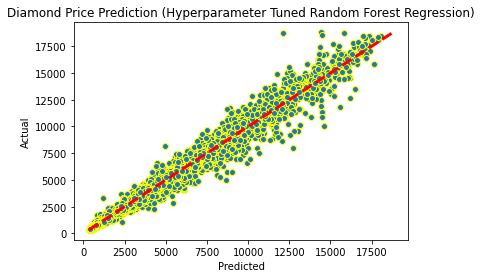

In [ ]:
# Model Evaluation with tuned hyperparameters
print("==============================================================================")
print("Random Forest")
print("R^2:",metrics.r2_score(y_test, pred_best_random))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred_best_random))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred_best_random))
print("MSE:",metrics.mean_squared_error(y_test, pred_best_random))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_best_random)))

fig, ax = plt.subplots()
ax.scatter(pred_best_random, y_test, edgecolors='yellow')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Diamond Price Prediction (Hyperparameter Tuned Random Forest Regression)')
plt.show()

print("===============================================================================")